In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from te_pai import Hamiltonian, resample, TE_PAI, Trotter, Observable

freqs = np.loadtxt("hamil_coef.csv", delimiter=",")

In [ ]:
numQs = 5
T = 2
n_snaps = 20
obs = Observable(numQs, [(1, [("X", 0)])])
hamil = Hamiltonian.spin_chain_hamil(numQs, freqs, 99)
res1 = Trotter(hamil, numQs, T, 100, n_snaps, "qulacs").run(obs, [0.0001,0.001])
res2 = Trotter(hamil, numQs, T, 100, n_snaps, "qiskit").run(obs, [0.0001,0.001])
res3 = Trotter(hamil, numQs, T, 100, n_snaps).run()
res4 = Trotter(hamil, numQs, T, 2000, n_snaps).run()
res5 = Trotter(hamil, numQs, T, 2000, n_snaps,"qiskit").run(obs, [0.0001,0.001])
for res in [res1, res2, res3, res4,res5]:
    res = [2 * x - 1 for x in res]
x = np.linspace(0, T, n_snaps + 1)
plt.figure(figsize=(10, 6))

plt.plot(
    x, res1, "r-", alpha=0.7, label="Reference \n(Lie Trotter, N=100 Qulacs Noisy)", linewidth=4
)
plt.plot(
    x, res2, "k-", alpha=0.7, label="Reference \n(Lie Trotter, N=100 Qiskit Noisy)", linewidth=4
)
plt.plot(
    x, res3, "g-", alpha=0.7, label="Reference \n(Lie Trotter, N=100 Qiskit)", linewidth=4
)

plt.plot(
    x, res4, "b-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000)", linewidth=4
)

plt.plot(
    x, res5, "c-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000 Qiskit Noisy)", linewidth=4
)

plt.title("$\\langle X_0 \\rangle$")
plt.xlabel("Time $T$")
plt.ylabel("Expectation value")
plt.legend(fontsize=16)
plt.grid(True)


The number of qubit:5
Number of terms in the Hamiltonian:20


AttributeError: 'list' object has no attribute 'to_qulacs'

The number of qubit:7
Number of terms in the Hamiltonian:28
1364.1101315222597 28


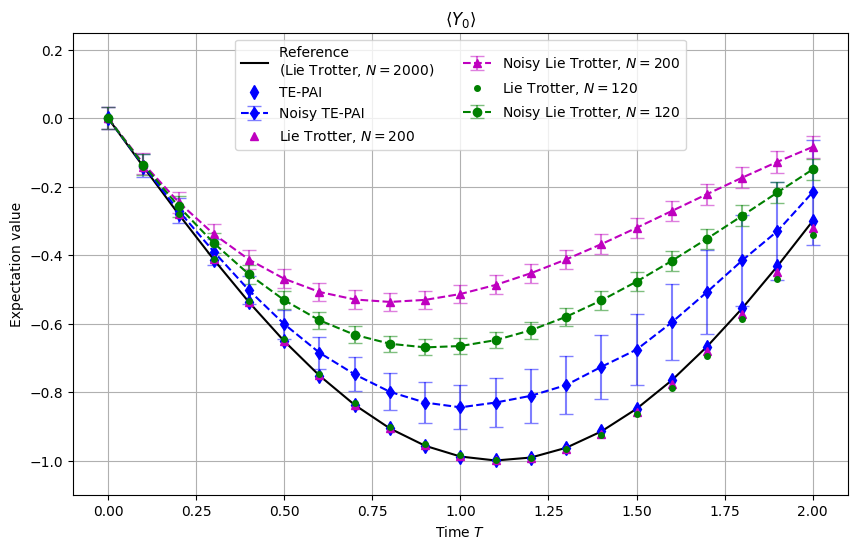

In [35]:

(Δ, T, n_snap) = (np.pi / (2**6), 2, 20)
err = [1e-4, 1e-3]
numQs = 7
obs = Observable(numQs, [(1, [("Y", 0)])])
hamil = Hamiltonian.spin_chain_hamil(numQs, freqs, 99)
te_pai = TE_PAI(hamil, numQs, Δ, T, 2000, n_snap)
trotter = Trotter(hamil, numQs, T, 2000, n_snap)
print(te_pai.expected_num_gates, trotter.L)
ms2 = 6
x = np.linspace(0, trotter.T, trotter.n_snap + 1)
y = [2 * p - 1 for p in trotter.run(obs)]

filname = "data/numQ7-T2-delta7-N2000-snap20-noisy.pkl"
if os.path.exists(filname):
    res = pickle.load(open(filname, "rb"))
else:
    res = te_pai.run_te_pai(10000, obs, err)
    pickle.dump(res, open(filname, "wb"))

pai_noisy = [resample(data) for data in res]
pai_noisy_mean, pai_noisy_std = zip(*[(np.mean(y), np.std(y)) for y in pai_noisy], strict=False)

N1 = 200
trotter = Trotter(hamil, numQs, T, N1, n_snap)
y1 = trotter.run(obs)
y1_mean = [2 * p - 1 for p in y1]
y1_std = [2 * np.sqrt(p * (1 - p)) / np.sqrt(1000) for p in y1]

y1_noisy = trotter.run(obs, err)
y1_noisy_mean = [2 * p - 1 for p in y1_noisy]
y1_noisy_std = [2 * np.sqrt(p * (1 - p)) / np.sqrt(1000) for p in y1_noisy]

N2 = 120
trotter = Trotter(hamil, numQs, T, N2, n_snap)
y2 = trotter.run(obs)
y2_mean = [2 * p - 1 for p in y2]
y2_std = [2 * np.sqrt(p * (1 - p)) / np.sqrt(1000) for p in y2]

y2_noisy = trotter.run(obs, err)
y2_noisy_mean = [2 * p - 1 for p in y2_noisy]
y2_noisy_std = [2 * np.sqrt(p * (1 - p)) / np.sqrt(1000) for p in y2_noisy]

plt.figure(figsize=(10, 6))

_, caps, bars = plt.errorbar(
    x,
    pai_noisy_mean,
    yerr=pai_noisy_std,
    fmt="b--d",
    label="Noisy TE-PAI",
    capsize=5,
    markersize=ms2,
)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
_, caps, bars = plt.errorbar(
    x,
    y1_mean,
    yerr=y1_std,
    fmt="m^",
    label=f"Lie Trotter, $N={N1}$",
    markersize=6,
)
[bar.set_alpha(0) for bar in bars]
[cap.set_alpha(0) for cap in caps]
line, caps, bars = plt.errorbar(
    x,
    y1_noisy_mean,
    yerr=y1_noisy_std,
    fmt="m--^",
    label=f"Noisy Lie Trotter, $N={N1}$",
    capsize=5,
    markersize=ms2,
)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

_, caps, bars = plt.errorbar(
    x,
    y2_mean,
    yerr=y2_std,
    fmt="go",
    label=f"Lie Trotter, $N={N2}$",
    markersize=4,
)
[bar.set_alpha(0) for bar in bars]
[cap.set_alpha(0) for cap in caps]
_, caps, bars = plt.errorbar(
    x,
    y2_noisy_mean,
    yerr=y2_noisy_std,
    fmt="g--o",
    label=f"Noisy Lie Trotter, $N={N2}$",
    capsize=5,
    markersize=ms2,
)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
plt.ylim(-1.1, 0.25)
plt.plot(x, y, "k-", label=f"Reference \n(Lie Trotter, $N={2000}$)")
plt.plot(x, y, "bd", markersize=7, label="TE-PAI")
plt.title("$\\langle Y_0 \\rangle$")
plt.xlabel("Time $T$")
plt.ylabel("Expectation value")
plt.legend(ncol=2)
plt.grid(True)

In [32]:
filname = "data/numQ7-T2-delta7-N2000-snap20-noisy.pkl"
res = pickle.load(open(filname, "rb")).transpose(1, 0, 2)
(Δ, T, n_snap) = (np.pi / (2**6), 2, 20)
err = [1e-4, 1e-3]
numQs = 7
obs = Observable(numQs, [(1, [("Y", 0)])])
hamil = Hamiltonian.spin_chain_hamil(numQs, freqs, 99)
te_pai = TE_PAI(hamil, numQs, Δ, T, 2000, n_snap, "qulacs")
res2  = te_pai.run_te_pai(6000, obs, err).transpose(1, 0, 2)
res = np.append(res, res2, axis=0).transpose(1, 0, 2)
pickle.dump(res, open(filname, "wb"))

The number of qubit:7
Number of terms in the Hamiltonian:28
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [30]:
res.shape

(21, 4000, 2)